<a href="https://colab.research.google.com/github/manepratham120/Machine-Learning-/blob/master/MPR_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------Exploratory Data analysis----------------------
   SR NO       player_name  age  player_height  player_weight  gp   pts  reb  \
0      0  Randy Livingston   22         193.04      94.800728  64   3.9  1.5   
1      1  Gaylon Nickerson   28         190.50      86.182480   4   3.8  1.3   
2      2      George Lynch   26         203.20     103.418976  41   8.3  6.4   
3      3    George McCloud   30         203.20     102.058200  64  10.2  2.8   
4      4      George Zidek   23         213.36     119.748288  52   2.8  1.7   

   ast  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  
0  2.4     0.042     0.071    0.169   0.487    0.248  
1  0.3     0.030     0.111    0.174   0.497    0.043  
2  1.9     0.106     0.185    0.175   0.512    0.125  
3  1.7     0.027     0.111    0.206   0.527    0.125  
4  0.3     0.102     0.169    0.195   0.500    0.064  
Information about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1

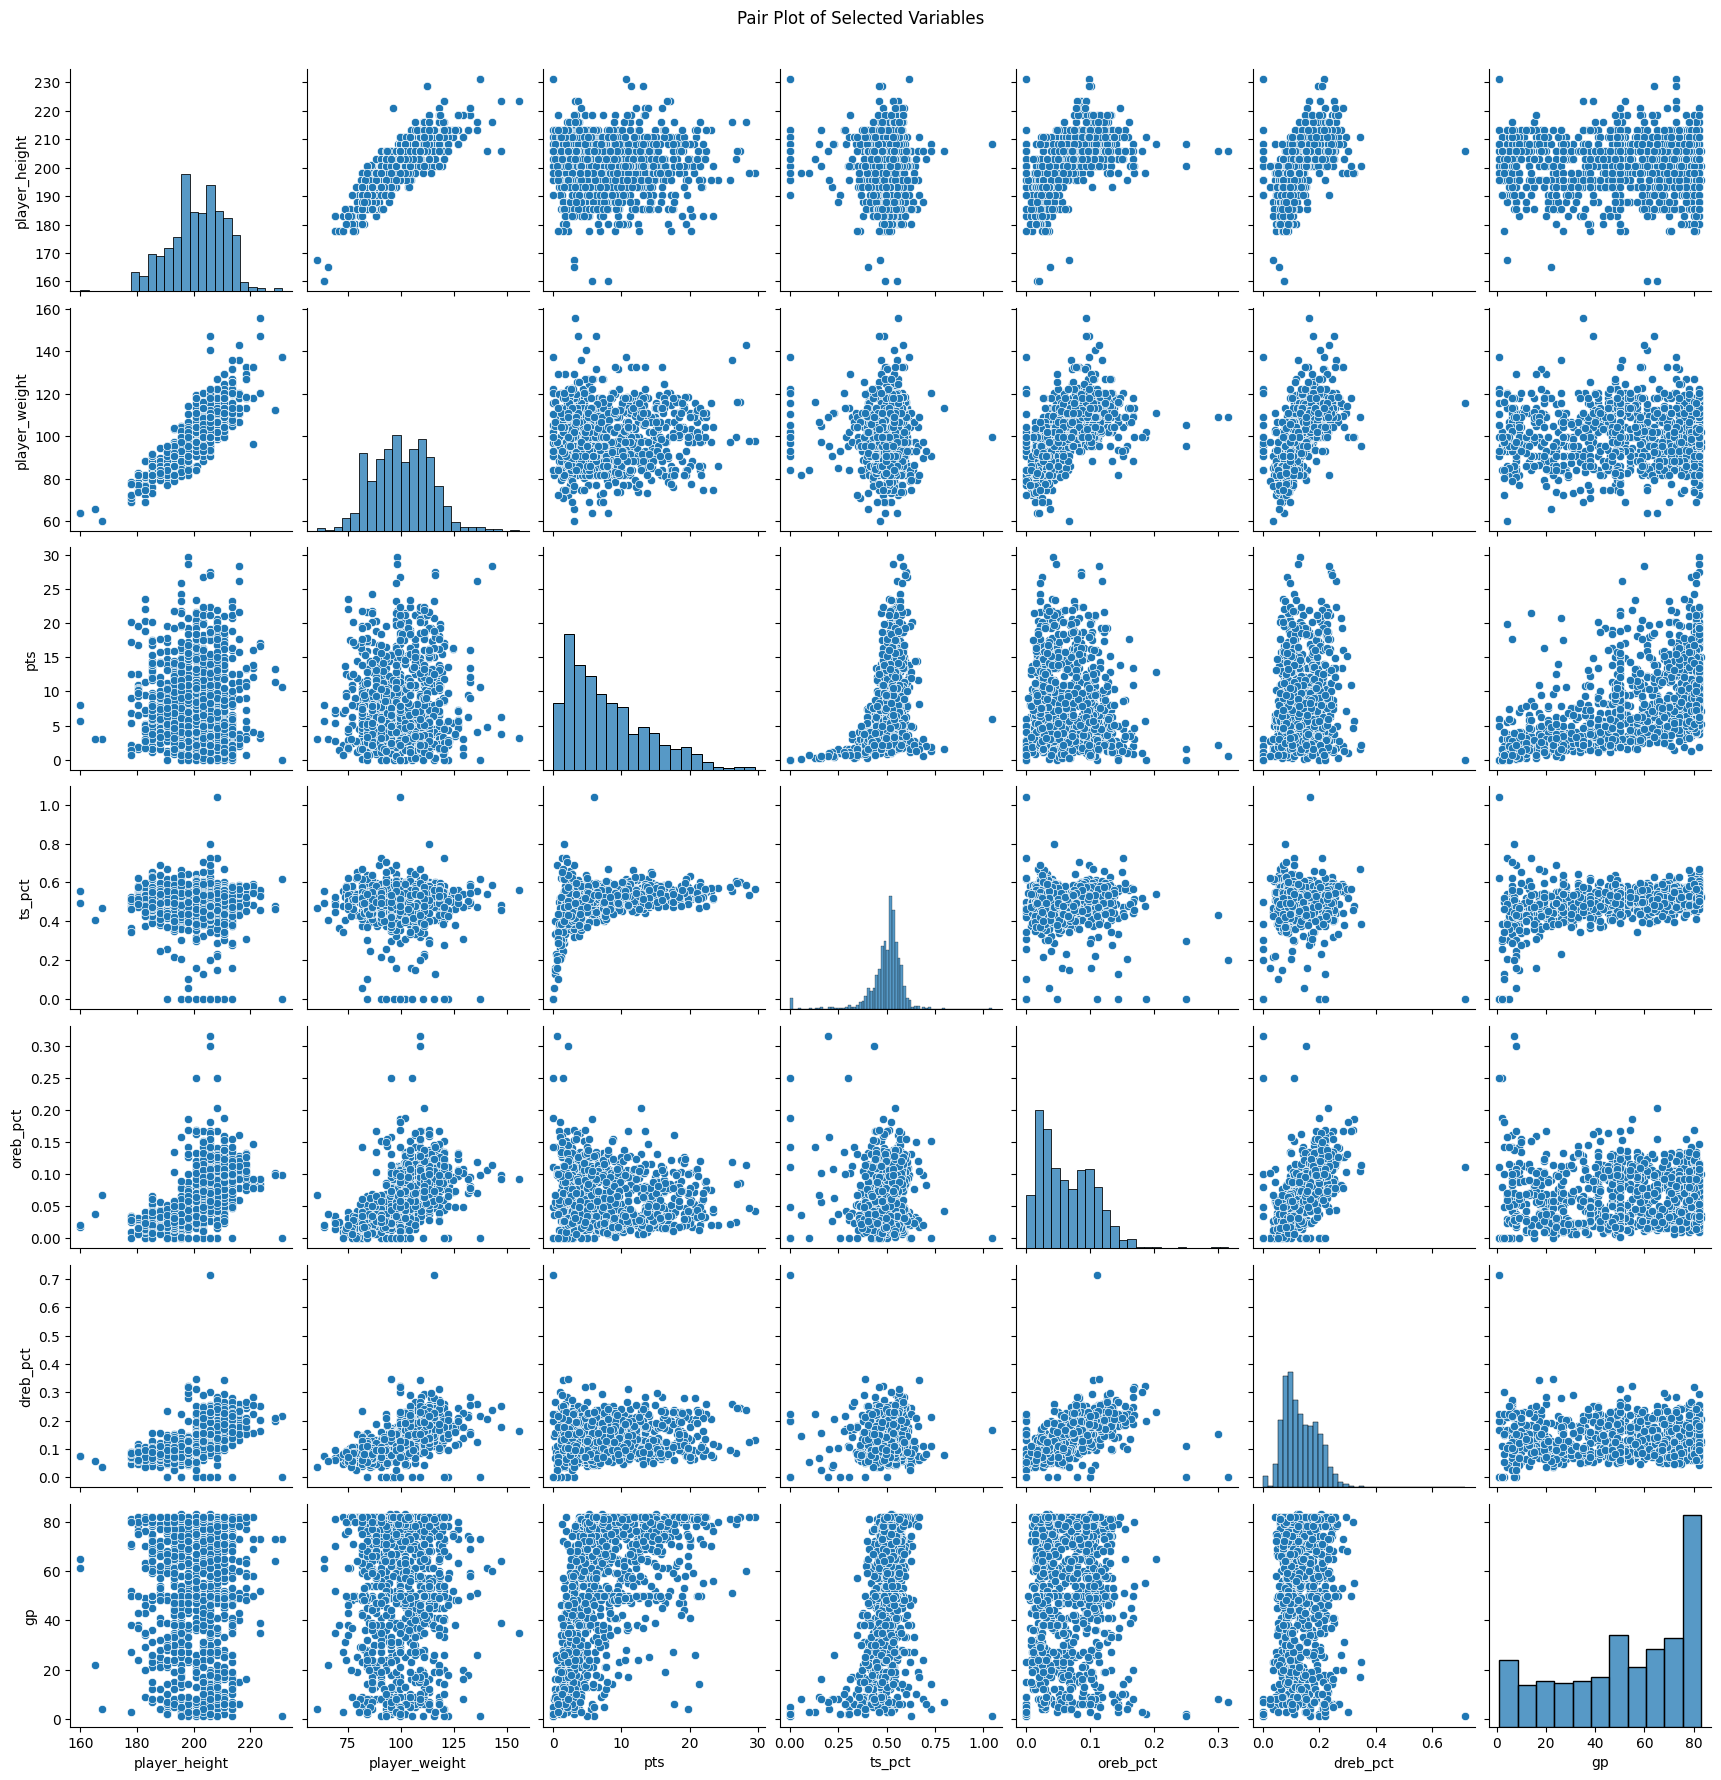

Result of Model prediction: 
[ 5.01059006 16.06216375 -3.16805935  8.83719973  5.86952393 13.10054006
  6.56057177  3.97038967  9.01310598  9.05256585  5.63164229  8.74603382
  2.95496474 13.63183679  3.14773608  5.96688524  6.27878408  3.6364689
  1.74205576  4.99517736  9.53574497 13.55298079 -0.54257802  7.76649034
 18.02372654 16.12965723  6.78262252  7.79134812  5.38452788 11.01122776
 12.11344441 -3.14105113  6.54939963 15.62249016  4.50368169  6.35467776
 10.65962244 10.19049091  7.11901159  8.4769992   6.67432399 12.44248117
  9.52995587  9.06386561  5.88123998 10.01337472  8.59040144  4.14465018
  4.11219178 17.60108912 -3.02305544  5.88762531 14.98505616  8.42132647
  5.99543187  4.47526369  6.85533305 10.50723351  5.86417571  5.45857497
  9.88662806  2.78197556  3.23829872 14.59243852 10.77488452 14.02314152
  2.65077826  4.25695807 15.73379822  7.3129198   4.81453333 12.97702866
  8.64705131  7.57237803  8.08142429 11.1585506   3.47893831  8.69892249
  2.45079252 10.4599351

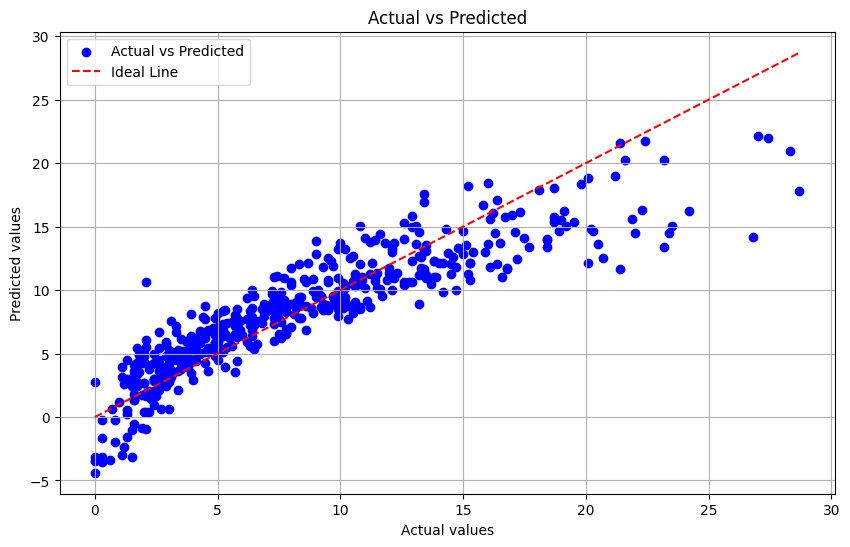

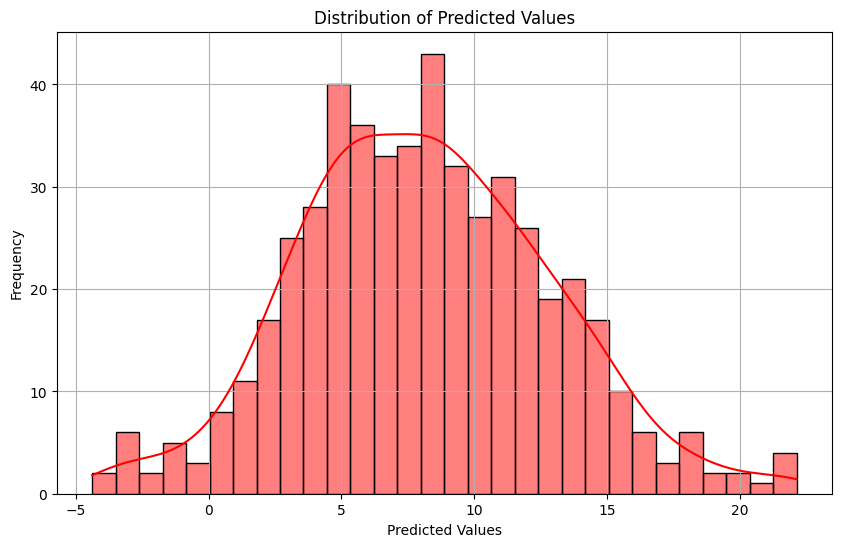

-----------------------------MODEL EVALUATION-------------------------------
 
Mean Squared Error: 6.520397734513684
Mean Absolute Error: 1.9011167902587787
Root Mean Squared Error: 2.5535069482015675
R-squared score: 0.8040152592841063


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Read the dataset
df = pd.read_csv('Dataset_1000.csv')
print("--------------------Exploratory Data analysis----------------------")
print(df.head())
print("Information about dataset:")
print(df.info())

# Select subset of columns for analysis
subset_columns = ['player_height', 'player_weight', 'pts', 'ts_pct', 'oreb_pct', 'dreb_pct', 'gp']

# Data analysis
sns.pairplot(df[subset_columns])

print(" ")
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

# Define features and target variable
X = df[['player_height', 'player_weight', 'oreb_pct', 'gp', 'ts_pct','reb','usg_pct','ast_pct']]
y = df['pts']

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)


class BayesianLinearRegression:
    def __init__(self, alpha=1, beta=1):
        self.alpha = alpha
        self.beta = beta
        self.w_mean = None
        self.w_cov = None

    def fit(self, X, y):
        X = tf.concat([tf.ones((tf.shape(X)[0], 1), dtype=tf.float64), X], axis=1)  # Add bias term
        D = X.shape[1]
        XtX = tf.matmul(tf.transpose(X), X)
        self.w_cov = tf.linalg.inv(self.alpha * tf.eye(D, dtype=tf.float64) + self.beta * XtX)
        self.w_mean = self.beta * tf.matmul(tf.matmul(self.w_cov, tf.transpose(X)), tf.expand_dims(y, axis=1))

    def predict(self, X):
        X = tf.concat([tf.ones((tf.shape(X)[0], 1), dtype=tf.float64), X], axis=1)  # Add bias term
        prediction = tf.matmul(X, self.w_mean)
        return tf.squeeze(prediction, axis=1).numpy()

# Instantiate the BayesianLinearRegression model
model = BayesianLinearRegression(alpha=1, beta=1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
print("Result of Model prediction: ")
y_pred = model.predict(X_test)
print(y_pred)

print("-----------------------VISUALIZATION OF RESULT-------------------------")
print(" ")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(y_pred, bins=30, kde=True, color='red')
plt.title('Distribution of Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


print("-----------------------------MODEL EVALUATION-------------------------------")
print(" ")

# Calculate Mean Squared Error
mse = tf.reduce_mean(tf.square(y_test - y_pred)).numpy()
print("Mean Squared Error:", mse)
# Calculate Mean Absolute Error
mae = tf.reduce_mean(tf.abs(y_test - y_pred)).numpy()
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error
rmse = tf.sqrt(mse).numpy()
print("Root Mean Squared Error:", rmse)
# Calculate R-squared score
def r_score(y_true, y_pred):
    y_mean = np.mean(y_true)
    tss = np.sum((y_true - y_mean)**2)
    rss = np.sum((y_true - y_pred)**2)
    r2 = 1 - (rss / tss)
    return r2

r_squared = r_score(y_test, y_pred)
print("R-squared score:", r_squared)